In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# jax
import jax.numpy as jnp
from jax import random
import time

# collocation
import sys
import os
p_ = os.path.abspath(os.path.join('..', '00_utils'))
if p_ not in sys.path:
    sys.path.append(p_)
    
import collocation_obj
import importlib

In [28]:
importlib.reload(collocation_obj)
Collocation = collocation_obj.Collocation

In [10]:
def f(x):
    return x * np.sin(x)

def df(x):
    return np.sin(x) + x*np.cos(x)

eval_pt = np.linspace(0, 2*np.pi, 100)
f_values = f(eval_pt)
df_analytical = df(eval_pt)
df_numerical = np.gradient(f_values, eval_pt)
error = np.linalg.norm(df_analytical - df_numerical)

print("Maximum error:", np.max(error))

Maximum error: 0.09501322546375748


In [45]:
gl_collocation = Collocation(32, 0, 6, 'gauss_legendre')

nodes = gl_collocation.compute_nodes()
D = gl_collocation.compute_derivative_matrix()

dy_dt = []
nodes_filtered = []

for i in range(len(nodes)):
    if i % 2 == 0:
        nodes_filtered.append(nodes[i])
        dy_dt.append(D[i] @ f(nodes))

In [35]:
# this approach involves re-computing the nodes and derivative matrix
gl_collocation_16 = Collocation(16, 0, 6, 'gauss_legendre')

nodes_16 = gl_collocation_16.compute_nodes()
D_16 = gl_collocation_16.compute_derivative_matrix()

dy_dt_16 = []
nodes_filtered_16 = []
for i in range(len(nodes_16)):
    nodes_filtered_16.append(nodes_16[i])
    dy_dt_16.append(D_16[i] @ f(nodes_16))

In [36]:
n = gl_collocation.compute_nodes()

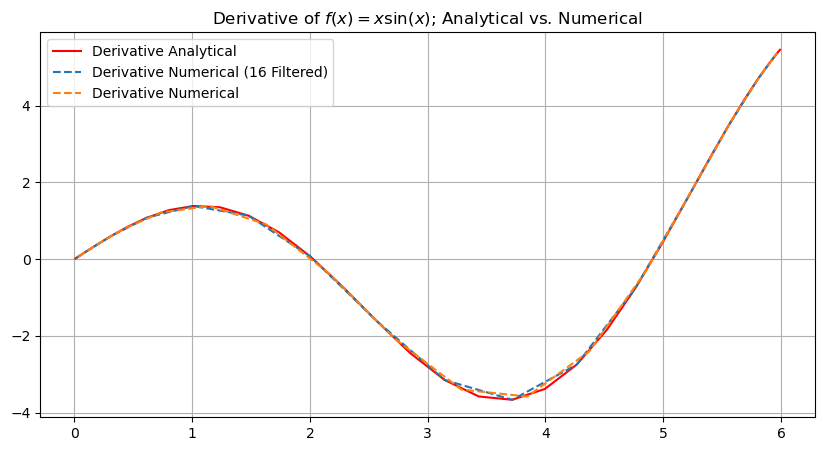

Maximum error: 0.09501322546375748


In [46]:
plt.figure(figsize=(10, 5))
plt.plot(n, df(n), color='red', label=f'Derivative Analytical')
plt.plot(nodes_filtered, dy_dt, '--', label=f'Derivative Numerical (16 Filtered)')
plt.plot(nodes_16, dy_dt_16, '--',label=f'Derivative Numerical')
plt.title('Derivative of $f(x) = x \sin(x)$; Analytical vs. Numerical')
plt.grid()
plt.legend()
plt.show();

# error = np.mean((df(nodes) - dy_dt)**2)

print("Maximum error:", np.max(error))